In [39]:
import pandas as pd
import matplotlib.pyplot as plt

### Load Dataset

In [40]:
df = pd.read_csv('Boston.csv')
df.head(10)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [43]:
X = df.loc[:,['lstat','ptratio','rm']]
Y = df.loc[:,"medv"]
X.shape,Y.shape

((506, 3), (506,))

### Preparing training and testing data set

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=10)

### Normalizing training and testing dataset

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Preparing model

In [78]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(128,input_shape=(3,),activation='relu',name='input'))
# model.add(Dense(64,activation='relu',name='layer_1'))
model.add(Dense(1,activation='linear',name='output'))

# model.add(Dense(1, input_shape=(x_train.shape[1], ), activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 128)               512       
                                                                 
 output (Dense)              (None, 1)                 129       
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [79]:
model.fit(x_train,y_train,epochs=100,validation_split=0.05)

Epoch 1/100
12/12 [==============================] - 1s 25ms/step - loss: 545.9453 - mae: 21.7098 - val_loss: 728.8585 - val_mae: 24.3451
Epoch 2/100
12/12 [==============================] - 0s 11ms/step - loss: 531.7558 - mae: 21.4046 - val_loss: 713.6260 - val_mae: 24.0432
Epoch 3/100
12/12 [==============================] - 0s 14ms/step - loss: 517.4393 - mae: 21.0961 - val_loss: 698.2388 - val_mae: 23.7354
Epoch 4/100
12/12 [==============================] - 0s 13ms/step - loss: 502.4284 - mae: 20.7693 - val_loss: 682.1516 - val_mae: 23.4140
Epoch 5/100
12/12 [==============================] - 0s 12ms/step - loss: 486.3670 - mae: 20.4212 - val_loss: 665.0691 - val_mae: 23.0720
Epoch 6/100
12/12 [==============================] - 0s 15ms/step - loss: 469.0334 - mae: 20.0437 - val_loss: 646.5744 - val_mae: 22.7024
Epoch 7/100
12/12 [==============================] - 0s 12ms/step - loss: 449.5208 - mae: 19.6175 - val_loss: 626.1032 - val_mae: 22.2918
Epoch 8/100
12/12 [===============

In [80]:
output = model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 4ms/step - loss: 24.1275 - mae: 3.3105


In [81]:
y_pred = model.predict(x_test)

4/4 [==============================] - 0s 4ms/step


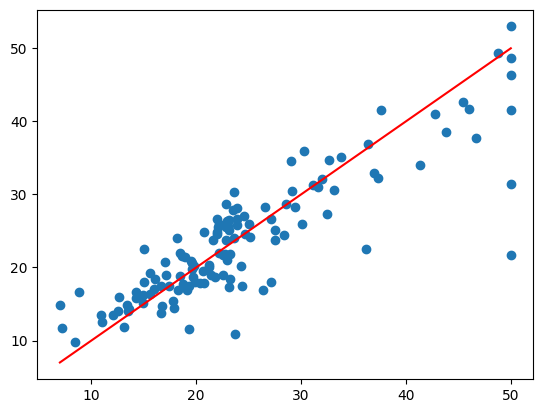

In [82]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r')